Probability:
- Bayesian:
    - Marginal Prob
    - Conditional Prob
    - Join Prob
- Frequentist
    - Marginal Prob
    - Conditional Prob
    - Join Prob

- Marginal Probability: P(X)
- Conditional Probability: P(X|y=Y)
- Join Probability: P(XY), rain vs sun

- X, Y independent:
    - P(XY) = P(X) * P(Y)
- X, Y dependent:
    - P(XY) = P(X | Y) * P(Y) = P(Y | X) * P(X)
    - P(X | Y) =  P(Y | X) * P(X) / P(Y) 
    - P(theta | X) = P(X | theta) * P(theta) / P(X)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

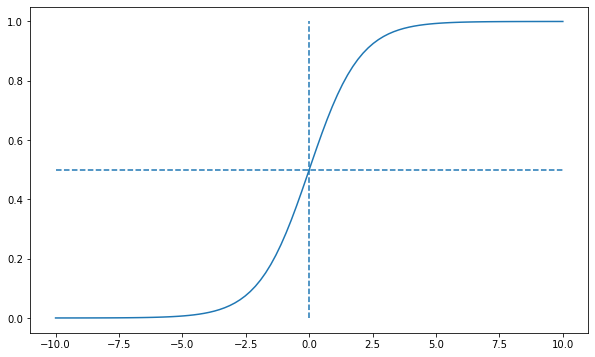

In [6]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.vlines(0, ymin=0, ymax=1, linestyles='--')
plt.hlines(0.5, xmin=-10, xmax=10, linestyles='--')
plt.show()

### Load dataset

In [8]:
churn_df = pd.read_csv('ChurnData.csv')
churn_df.shape

(200, 28)

In [10]:
pd.options.display.max_columns = 30

In [11]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Exploratory Data Analysis

In [13]:
churn_df.isna().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [15]:
churn_df.churn.value_counts(normalize=True)

0.0    0.71
1.0    0.29
Name: churn, dtype: float64

In [24]:
22/25

0.88

In [16]:
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [ ]:
sns.pairplot(churn_df, height=3, aspect=2);

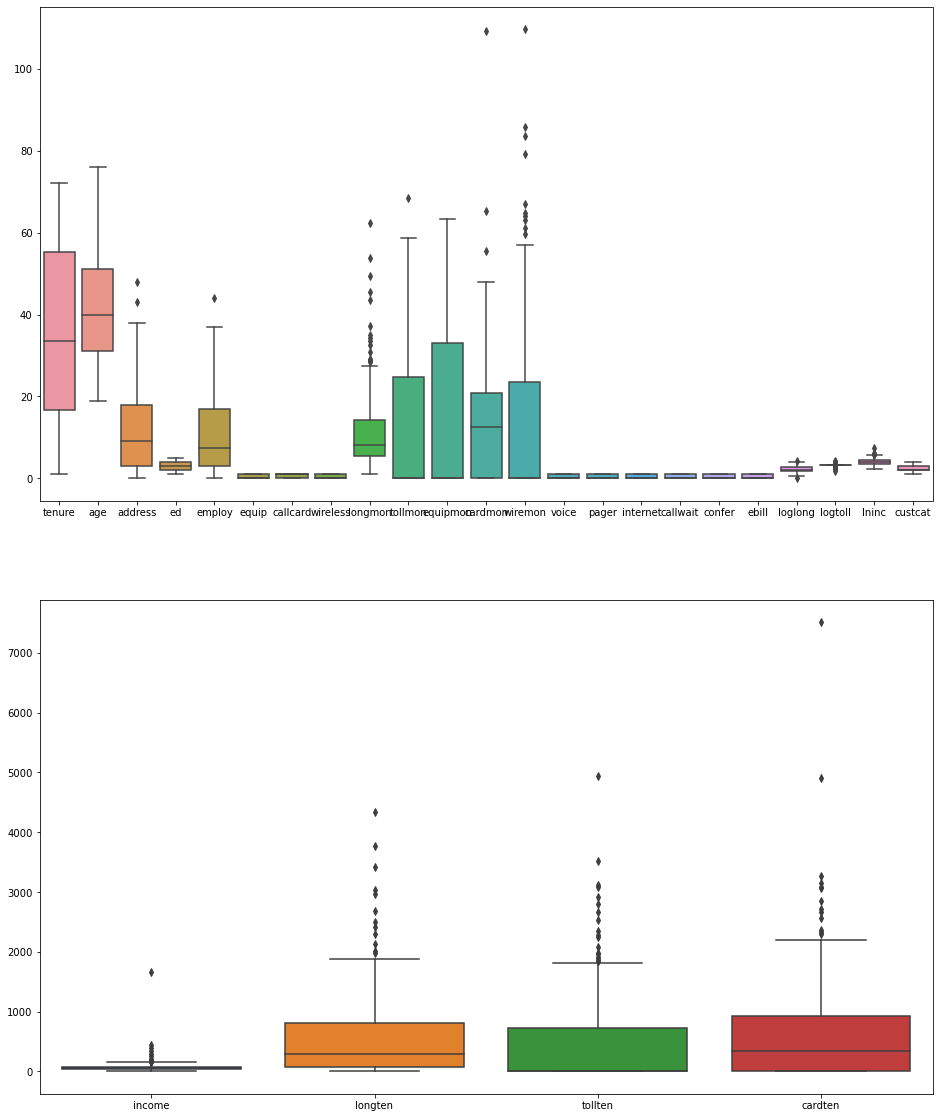

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(16, 20))
sns.boxplot(data=churn_df.drop(columns=['income', 'longten', 'tollten', 'cardten', 'churn']), ax=ax[0])
sns.boxplot(data=churn_df[['income', 'longten', 'tollten', 'cardten']], ax=ax[1]);

#### PIPELINE

In [43]:
X_train, X_test, y_train, y_test = train_test_split(churn_df.drop(columns='churn'), churn_df.churn, test_size=0.1, shuffle=True, 
                                                   stratify=churn_df.churn, random_state=4)

In [44]:
y_train.value_counts(normalize=True)

0.0    0.711111
1.0    0.288889
Name: churn, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

0.0    0.7
1.0    0.3
Name: churn, dtype: float64

In [49]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('lr', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LogisticRegression())])

In [55]:
pipe.score(X_test, y_test)

0.8

In [58]:
predicted_prob = pipe.predict_proba(X_test)[:, 1]
predicted_y = pipe.predict(X_test)

In [61]:
np.where(predicted_prob > 0.5, 1, 0)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [76]:
predicted_y = np.where(predicted_prob > 0.2, 1, 0)

### Evaluation

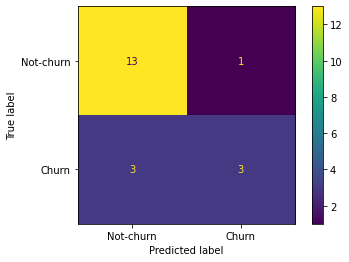

In [64]:
plot_confusion_matrix(pipe, X_test, y_test, labels=[0, 1],
                     display_labels=['Not-churn', 'Churn'], values_format='d');

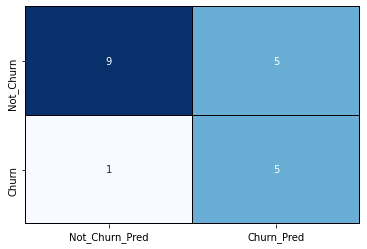

In [77]:
sns.heatmap(confusion_matrix(y_test, predicted_y), fmt='d', linewidths=0.2, annot=True, cbar=False, cmap='Blues', linecolor='black',
           xticklabels=['Not_Churn_Pred', 'Churn_Pred'], yticklabels=['Not_Churn', 'Churn']);

In [78]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75        14
         1.0       0.50      0.83      0.62         6

    accuracy                           0.70        20
   macro avg       0.70      0.74      0.69        20
weighted avg       0.78      0.70      0.71        20



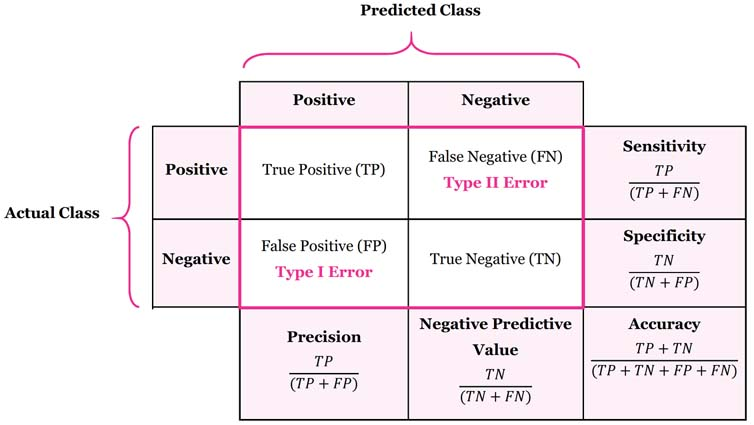

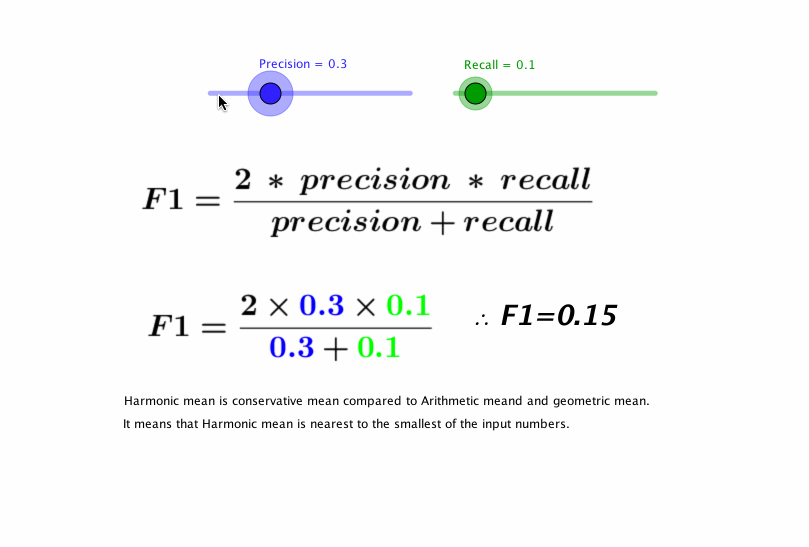